## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Power load dataset
load_dataset = pd.read_csv("data/load_data_clean.csv")
# Meterological dataset
met_dataset = pd.read_csv("data/met_data_clean.csv")

In [3]:
load_df = pd.DataFrame(load_dataset)
met_df = pd.DataFrame(met_dataset)

In [4]:
load_df["DATE (MM/DD/YYYY)"] = pd.to_datetime(
    load_df["DATE (MM/DD/YYYY)"], format="%m/%d/%Y"
)

met_df["DATE (MM/DD/YYYY)"] = pd.to_datetime(
    met_df["DATE (MM/DD/YYYY)"], format="%m/%d/%Y"
)

In [5]:
load_df.head()

,DATE (MM/DD/YYYY),KW,KWS,CHWTON,HTmmBTU,Combined mmBTU,Combined Tons Carbon,KW#Houses,KWlightbulbs,KWgalsgas,...,CHWTONlightbulbs,CHWTONgalsgas,HTmmBTU#Houses,HTmmBTUlightbulbs,HTmmBTUgalsgas,Total#Houses,Totallightbulbs,Totalgalsgas,GHG,DOW
0,2024-05-01,351973.45,39367.64,117009.06,115.27,2720.37,497.21,100564,25140971,9608,...,29385656,11233,9652,2412510,922,227789,56939137,969870,169.754,4
1,2024-05-02,353826.38,39144.04,119220.71,115.03,2752.99,503.17,101093,25273323,9658,...,29941089,11445,9632,2407457,920,230520,57621868,987740,170.867,5
2,2024-05-03,357657.88,38935.34,123171.43,109.79,2808.22,513.27,102188,25547001,9763,...,30933274,11824,9193,2297666,878,235145,58777940,1019713,173.062,6
3,2024-05-04,363958.25,38676.54,118279.24,108.33,2769.56,506.20,103988,25997028,9935,...,29704649,11355,9071,2267263,867,231908,57968940,981181,176.630,7
4,2024-05-05,320144.95,33341.16,106070.52,108.39,2473.62,452.11,91470,22867506,8739,...,26638552,10183,9076,2268428,867,207127,51774485,879305,155.741,1


Here is an explanation of each data column of load dataset:

1. **DATE (MM/DD/YYYY):**
   - **Description:** The date in the format Month/Day/Year.
   - **Example:** `05/01/2024` represents May 1, 2024.

2. **KW:**
   - **Description:** The total kilowatt (KW) power consumption for the day.
   - **Example:** `351973.45` KW represents the total power consumption on the given day.

3. **KWS:**
   - **Description:** The total power consumption in kilowatt-hours (KWH).
   - **Example:** `39367.64` KWS represents the total power consumption in KWH.

4. **CHWTON:**
   - **Description:** The total cooling energy consumption in cooling tons.
   - **Example:** `117009.06` CHWTON represents the cooling energy consumption.

5. **HTmmBTU:**
   - **Description:** The total heating energy consumption in million British thermal units (mmBTU).
   - **Example:** `115.27` HTmmBTU represents the heating energy consumption.

6. **Combined mmBTU:**
   - **Description:** The combined energy consumption (cooling and heating) in million British thermal units (mmBTU).
   - **Example:** `2720.37` Combined mmBTU represents the combined energy consumption.

7. **Combined Tons Carbon:**
   - **Description:** The combined carbon emissions in tons.
   - **Example:** `497.21` Combined Tons Carbon represents the total carbon emissions.

8. **KW#Houses:**
   - **Description:** The equivalent number of houses that the KW consumption can power.
   - **Example:** `100564` houses can be powered by the KW consumption.

9. **KWlightbulbs:**
   - **Description:** The equivalent number of lightbulbs that the KW consumption can power.
   - **Example:** `25140971` lightbulbs can be powered by the KW consumption.

10. **KWgalsgas:**
    - **Description:** The equivalent number of gallons of gasoline that the KW consumption can power.
    - **Example:** `9608` gallons of gasoline can be powered by the KW consumption.

11. **CHWTON#Houses:**
    - **Description:** The equivalent number of houses that the cooling energy (CHWTON) consumption can power.
    - **Example:** `117572` houses can be powered by the cooling energy consumption.

12. **CHWTONlightbulbs:**
    - **Description:** The equivalent number of lightbulbs that the cooling energy (CHWTON) consumption can power.
    - **Example:** `29385656` lightbulbs can be powered by the cooling energy consumption.

13. **CHWTONgalsgas:**
    - **Description:** The equivalent number of gallons of gasoline that the cooling energy (CHWTON) consumption can power.
    - **Example:** `11233` gallons of gasoline can be powered by the cooling energy consumption.

14. **HTmmBTU#Houses:**
    - **Description:** The equivalent number of houses that the heating energy (HTmmBTU) consumption can power.
    - **Example:** `9652` houses can be powered by the heating energy consumption.

15. **HTmmBTUlightbulbs:**
    - **Description:** The equivalent number of lightbulbs that the heating energy (HTmmBTU) consumption can power.
    - **Example:** `2412510` lightbulbs can be powered by the heating energy consumption.

16. **HTmmBTUgalsgas:**
    - **Description:** The equivalent number of gallons of gasoline that the heating energy (HTmmBTU) consumption can power.
    - **Example:** `922` gallons of gasoline can be powered by the heating energy consumption.

17. **Total#Houses:**
    - **Description:** The total equivalent number of houses that the combined energy consumption can power.
    - **Example:** `227789` houses can be powered by the combined energy consumption.

18. **Totallightbulbs:**
    - **Description:** The total equivalent number of lightbulbs that the combined energy consumption can power.
    - **Example:** `56939137` lightbulbs can be powered by the combined energy consumption.

19. **Totalgalsgas:**
    - **Description:** The total equivalent number of gallons of gasoline that the combined energy consumption can power.
    - **Example:** `969870` gallons of gasoline can be powered by the combined energy consumption.

20. **GHG:**
    - **Description:** Greenhouse gas emissions.
    - **Example:** `169.754` represents the greenhouse gas emissions.

21. **DOW:**
    - **Description:** Day of the week, where 1 represents Monday, 2 represents Tuesday, etc.
    - **Example:** `4` represents Thursday.

In [6]:
met_df.head()

,DATE (MM/DD/YYYY),AVG Air Temperature [deg F],MAX Air Temperature [deg F],MIN Air Temperature [deg F],AVG Rel Humidity [%],MAX Rel Humidity [%],MIN Rel Humidity [%],AVG Avg Wind Speed @ 3m [MPH],MAX Avg Wind Speed @ 3m [MPH],MIN Avg Wind Speed @ 3m [MPH],AVG Peak Wind Speed @ 3m [MPH],MAX Peak Wind Speed @ 3m [MPH],MIN Peak Wind Speed @ 3m [MPH],AVG Station Pressure [inHg],MAX Station Pressure [inHg],MIN Station Pressure [inHg]
0,2024-05-01,76.2268,87.494,61.322,19.3349,34.09,8.040,7.5972,24.4721,0.0,11.1715,30.6460,0.0,27.2098,27.2561,27.1436
1,2024-05-02,76.1305,89.690,60.836,18.6194,36.39,6.938,5.1366,22.8839,0.0,8.0311,27.2906,0.0,27.2407,27.2873,27.1868
2,2024-05-03,77.3261,89.960,63.878,19.7970,41.99,6.877,5.7147,23.8457,0.0,8.8923,39.0345,0.0,27.2277,27.2663,27.1653
3,2024-05-04,76.8995,89.762,61.106,17.8820,31.30,6.234,5.5733,20.5574,0.0,8.6903,25.6129,0.0,27.2277,27.2670,27.1798
4,2024-05-05,75.1771,86.774,63.176,18.5651,30.04,9.040,11.2813,32.4132,0.0,16.0872,44.0676,0.0,27.2212,27.2677,27.1493


Here is an explanation of each column in the meteorological dataset:

1. **DATE (MM/DD/YYYY):**
   - **Description:** The date in the format Month/Day/Year.
   - **Example:** `05/01/2024` represents May 1, 2024.

2. **AVG Air Temperature [deg F]:**
   - **Description:** The average air temperature in degrees Fahrenheit for the day.
   - **Example:** `76.2268` degrees Fahrenheit.

3. **MAX Air Temperature [deg F]:**
   - **Description:** The maximum air temperature in degrees Fahrenheit for the day.
   - **Example:** `87.494` degrees Fahrenheit.

4. **MIN Air Temperature [deg F]:**
   - **Description:** The minimum air temperature in degrees Fahrenheit for the day.
   - **Example:** `61.322` degrees Fahrenheit.

5. **AVG Rel Humidity [%]:**
   - **Description:** The average relative humidity as a percentage for the day.
   - **Example:** `19.3349%`.

6. **MAX Rel Humidity [%]:**
   - **Description:** The maximum relative humidity as a percentage for the day.
   - **Example:** `34.09%`.

7. **MIN Rel Humidity [%]:**
   - **Description:** The minimum relative humidity as a percentage for the day.
   - **Example:** `8.04%`.

8. **AVG Avg Wind Speed @ 3m [MPH]:**
   - **Description:** The average wind speed at 3 meters above ground level in miles per hour for the day.
   - **Example:** `7.5972` miles per hour.

9. **MAX Avg Wind Speed @ 3m [MPH]:**
   - **Description:** The maximum average wind speed at 3 meters above ground level in miles per hour for the day.
   - **Example:** `24.4721` miles per hour.

10. **MIN Avg Wind Speed @ 3m [MPH]:**
    - **Description:** The minimum average wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `0.0` miles per hour.

11. **AVG Peak Wind Speed @ 3m [MPH]:**
    - **Description:** The average peak wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `11.1715` miles per hour.

12. **MAX Peak Wind Speed @ 3m [MPH]:**
    - **Description:** The maximum peak wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `30.646` miles per hour.

13. **MIN Peak Wind Speed @ 3m [MPH]:**
    - **Description:** The minimum peak wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `0.0` miles per hour.

14. **AVG Station Pressure [inHg]:**
    - **Description:** The average station pressure in inches of mercury for the day.
    - **Example:** `27.2098` inches of mercury.

15. **MAX Station Pressure [inHg]:**
    - **Description:** The maximum station pressure in inches of mercury for the day.
    - **Example:** `27.2561` inches of mercury.

16. **MIN Station Pressure [inHg]:**
    - **Description:** The minimum station pressure in inches of mercury for the day.
    - **Example:** `27.1436` inches of mercury.

These columns represent various meteorological measurements that can influence power load and consumption patterns. By incorporating this data into our analysis, we can build models that account for the impact of weather conditions on power usage.

In [7]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE (MM/DD/YYYY)     61 non-null     datetime64[ns]
 1   KW                    61 non-null     float64       
 2   KWS                   61 non-null     float64       
 3   CHWTON                61 non-null     float64       
 4   HTmmBTU               61 non-null     float64       
 5   Combined mmBTU        61 non-null     float64       
 6   Combined Tons Carbon  61 non-null     float64       
 7   KW#Houses             61 non-null     int64         
 8   KWlightbulbs          61 non-null     int64         
 9   KWgalsgas             61 non-null     int64         
 10  CHWTON#Houses         61 non-null     int64         
 11  CHWTONlightbulbs      61 non-null     int64         
 12  CHWTONgalsgas         61 non-null     int64         
 13  HTmmBTU#Houses        

In [8]:
met_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE (MM/DD/YYYY)               61 non-null     datetime64[ns]
 1   AVG Air Temperature [deg F]     61 non-null     float64       
 2   MAX Air Temperature [deg F]     61 non-null     float64       
 3   MIN Air Temperature [deg F]     61 non-null     float64       
 4   AVG Rel Humidity [%]            61 non-null     float64       
 5   MAX Rel Humidity [%]            61 non-null     float64       
 6   MIN Rel Humidity [%]            61 non-null     float64       
 7   AVG Avg Wind Speed @ 3m [MPH]   61 non-null     float64       
 8   MAX Avg Wind Speed @ 3m [MPH]   61 non-null     float64       
 9   MIN Avg Wind Speed @ 3m [MPH]   61 non-null     float64       
 10  AVG Peak Wind Speed @ 3m [MPH]  61 non-null     float64       
 11  MAX Peak

In [9]:
merged_df = pd.merge(load_df, met_df, on="DATE (MM/DD/YYYY)", how="inner")

In [10]:
merged_df.head()

,DATE (MM/DD/YYYY),KW,KWS,CHWTON,HTmmBTU,Combined mmBTU,Combined Tons Carbon,KW#Houses,KWlightbulbs,KWgalsgas,...,MIN Rel Humidity [%],AVG Avg Wind Speed @ 3m [MPH],MAX Avg Wind Speed @ 3m [MPH],MIN Avg Wind Speed @ 3m [MPH],AVG Peak Wind Speed @ 3m [MPH],MAX Peak Wind Speed @ 3m [MPH],MIN Peak Wind Speed @ 3m [MPH],AVG Station Pressure [inHg],MAX Station Pressure [inHg],MIN Station Pressure [inHg]
0,2024-05-01,351973.45,39367.64,117009.06,115.27,2720.37,497.21,100564,25140971,9608,...,8.040,7.5972,24.4721,0.0,11.1715,30.6460,0.0,27.2098,27.2561,27.1436
1,2024-05-02,353826.38,39144.04,119220.71,115.03,2752.99,503.17,101093,25273323,9658,...,6.938,5.1366,22.8839,0.0,8.0311,27.2906,0.0,27.2407,27.2873,27.1868
2,2024-05-03,357657.88,38935.34,123171.43,109.79,2808.22,513.27,102188,25547001,9763,...,6.877,5.7147,23.8457,0.0,8.8923,39.0345,0.0,27.2277,27.2663,27.1653
3,2024-05-04,363958.25,38676.54,118279.24,108.33,2769.56,506.20,103988,25997028,9935,...,6.234,5.5733,20.5574,0.0,8.6903,25.6129,0.0,27.2277,27.2670,27.1798
4,2024-05-05,320144.95,33341.16,106070.52,108.39,2473.62,452.11,91470,22867506,8739,...,9.040,11.2813,32.4132,0.0,16.0872,44.0676,0.0,27.2212,27.2677,27.1493


## Model Training

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

In [12]:
feature_columns = [
    "DOW",
    "AVG Air Temperature [deg F]",
    "MAX Air Temperature [deg F]",
    "MIN Air Temperature [deg F]",
    "AVG Rel Humidity [%]",
    "MAX Rel Humidity [%]",
    "MIN Rel Humidity [%]",
    "AVG Avg Wind Speed @ 3m [MPH]",
    "MAX Avg Wind Speed @ 3m [MPH]",
    "MIN Avg Wind Speed @ 3m [MPH]",
    "AVG Peak Wind Speed @ 3m [MPH]",
    "MAX Peak Wind Speed @ 3m [MPH]",
    "MIN Peak Wind Speed @ 3m [MPH]",
    "AVG Station Pressure [inHg]",
    "MAX Station Pressure [inHg]",
    "MIN Station Pressure [inHg]",
]

In [13]:
target_columns = [
    "KW",
    "GHG",
    "Combined Tons Carbon",
    "CHWTON",
    "HTmmBTU",
    "Combined mmBTU",
]

In [14]:
X = merged_df[feature_columns]
y = merged_df[target_columns]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [18]:
# Reshape the data to fit LSTM input format (samples, time steps, features)
X_train_lstm = np.reshape(
    X_train, (X_train.shape[0], 1, X_train.shape[1])
)
X_test_lstm = np.reshape(
    X_test, (X_test.shape[0], 1, X_test.shape[1])
)

In [19]:
inputs = Input(shape=(1, X_train.shape[1]))

In [20]:
x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(32)(x)

In [21]:
outputs = Dense(len(target_columns), activation="linear")(x)

In [22]:
my_model = Model(inputs, outputs)

In [23]:
my_model.compile(optimizer="adam", loss="mean_squared_error")

In [24]:
model_train = my_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - loss: 0.9501 - val_loss: 1.1435
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9334 - val_loss: 1.1386
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9356 - val_loss: 1.1339
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.9631 - val_loss: 1.1294
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9375 - val_loss: 1.1246
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9409 - val_loss: 1.1189
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9109 - val_loss: 1.1129
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9119 - val_loss: 1.1065
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9032 - val_loss: 1.0997
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9052 - val_loss: 1.0924
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9192 - val_loss: 1.0845
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8763 - val_los

In [25]:
# Evaluate the model on the test set
test_loss = my_model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {test_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2160
Test Loss: 0.2159513384103775


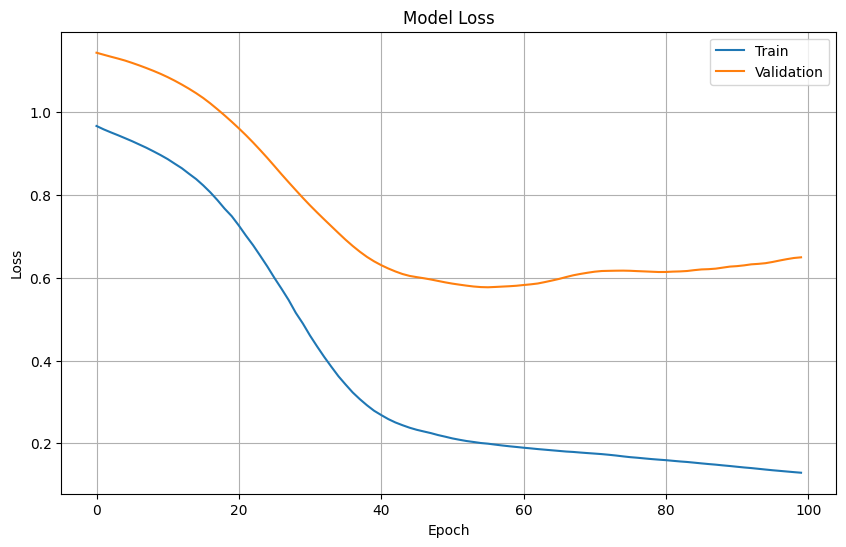

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(model_train.history["loss"])
plt.plot(model_train.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.grid(True)
plt.show()

At (0,0) train is around at 0.92 in y-axis and validation value is 1.09 in y-axis. Then gradually going down, at (100, 100) epoch, the train value is around 0.05 and validation value is around 0.62 in y-axis.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = my_model.predict(X_test_lstm)

# Ensure the predictions and true values have the correct shape
if y_pred.ndim == 1:
    y_pred_scaled = y_pred.reshape(-1, 1)
if y_test.ndim == 1:
    y_test = y_test.reshape(-1, 1)

# Initialize lists to store metrics
mse_list = []
mae_list = []
r2_list = []
accuracy_list = []

# Set tolerance level for accuracy (example: 10% of the actual value)
tolerance = 0.1

# Compute metrics for each target variable
for i, target in enumerate(target_columns):
    y_true = y_test[:, i]
    y_pred = y_pred[:, i]

    # Mean Squared Error
    mse = mean_squared_error(y_true, y_pred)
    mse_list.append(mse)

    # Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred)
    mae_list.append(mae)

    # R-squared
    r2 = r2_score(y_true, y_pred)
    r2_list.append(r2)

    # Accuracy (percentage of predictions within the tolerance range of actual values)
    accuracy = np.mean(np.abs((y_true - y_pred) / y_true) < tolerance)
    accuracy_list.append(accuracy)

    print(f"Metrics for {target}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R-squared: {r2:.4f}")
    print(f"  Accuracy: {accuracy:.4%}")
    print()

# Overall summary
print("Overall Metrics:")
print(f"  Average MSE: {np.mean(mse_list):.4f}")
print(f"  Average MAE: {np.mean(mae_list):.4f}")
print(f"  Average R-squared: {np.mean(r2_list):.4f}")
print(f"  Average Accuracy: {np.mean(accuracy_list):.4%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
Metrics for KW:
  MSE: 0.5342
  MAE: 0.5386
  R-squared: -0.0778
  Accuracy: 15.3846%



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed